# Support Vector Machine 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SVMdataset.csv')

In [3]:
df.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
x1    863 non-null float64
x2    863 non-null float64
y     863 non-null int64
dtypes: float64(2), int64(1)
memory usage: 20.3 KB


In [5]:
df.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


In [7]:
X = df.iloc[:,[0,1]].values
Y = df.iloc[:,2].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_x = StandardScaler()

In [12]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Fitting SVM Linear Model 

In [13]:
from sklearn.svm import SVC

In [14]:
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [15]:
y_pred = classifier.predict(X_test)

# Making Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

In [31]:
cm

array([[ 61,  99],
       [ 61, 125]], dtype=int64)

In [18]:
import seaborn as sns

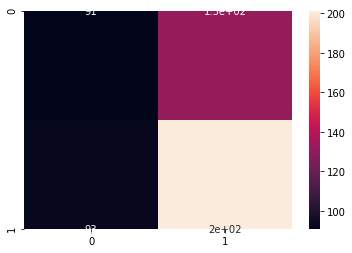

In [39]:

sns.heatmap(cm,annot=True)

In [63]:
# prediction on training data
yt_pred = classifier.predict(X_train)

In [64]:
cm = confusion_matrix(Y_train,yt_pred)

In [65]:
cm

array([[ 91, 132],
       [ 93, 201]], dtype=int64)

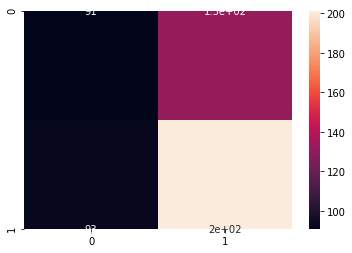

In [40]:

sns.heatmap(cm,annot=True)

# Visualizing the Training Data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


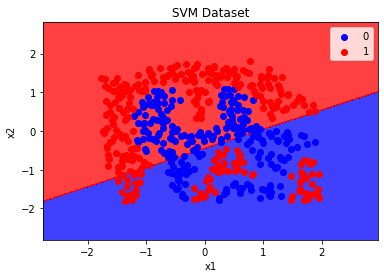

In [45]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('SVM Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Visualizing Test Data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


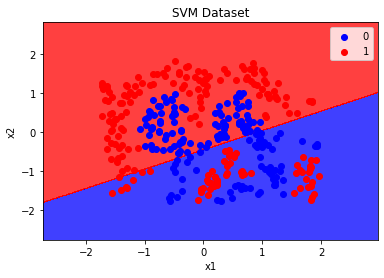

In [46]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('SVM Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Using Gird Search CV to find best C value 

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {'C':(0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000)}

In [51]:
from sklearn import svm
clf_svm_l = svm.SVC(kernel='linear')

In [52]:
svm_grid_lin = GridSearchCV(clf_svm_l, params, n_jobs=-1,
                            cv=10, verbose=1, scoring='accuracy')

In [54]:
svm_grid_lin.fit(X_train, Y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.8s finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [55]:
svm_grid_lin.best_params_

{'C': 0.001}

In [56]:
linsvm_clf = svm_grid_lin.best_estimator_

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [60]:
accuracy_score(Y_test, linsvm_clf.predict(X_test))

0.5375722543352601

## Classification Reports for Different Datasets

In [74]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [73]:
accuracy_score(Y_train,yt_pred)

0.5647969052224371

In [75]:
recall_score(Y_train,yt_pred)

0.6836734693877551

In [76]:
precision_score(Y_train,yt_pred)

0.6036036036036037

In [77]:
f1_score(Y_train,yt_pred)

0.6411483253588517

# Fitting Kernel_SVM Classification Model

In [79]:
clf_svm_r = svm.SVC(kernel='rbf', gamma=0.5, C=10)
clf_svm_r.fit(X_train, Y_train)

SVC(C=10, gamma=0.5)

In [80]:
y_train_pred = clf_svm_r.predict(X_train)

In [81]:
y_train_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,

In [82]:
y_test_pred = clf_svm_r.predict(X_test)

In [83]:
accuracy_score(Y_train,y_train_pred)

0.9303675048355899

In [84]:
accuracy_score(Y_test,y_test_pred)

0.930635838150289

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train,y_train_pred)

In [87]:
cm

array([[213,  10],
       [ 26, 268]], dtype=int64)

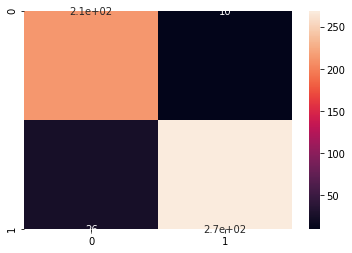

In [90]:

sns.heatmap(cm,annot=True)

In [88]:
cma = confusion_matrix(Y_test,y_test_pred)

In [89]:
cma

array([[153,   7],
       [ 17, 169]], dtype=int64)

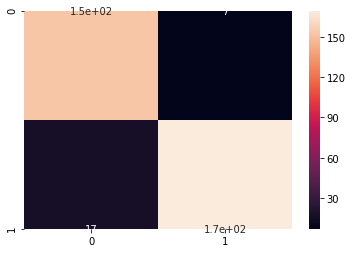

In [91]:

sns.heatmap(cma,annot=True)

## Applying Grid Search for Kernel RBF

In [92]:
params = {'C':(0.01,0.05, 0.1, 0.5, 1, 5, 10, 50), 
          'gamma':(0.001, 0.01, 0.1, 0.5, 1)}

In [93]:
clf_svm_r = svm.SVC(kernel='rbf')

In [94]:

svm_grid_rad = GridSearchCV(clf_svm_r, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')

In [95]:
svm_grid_rad.fit(X_train, Y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.7s finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [96]:
svm_grid_rad.best_params_

{'C': 50, 'gamma': 1}

In [97]:
radsvm_clf = svm_grid_rad.best_estimator_

In [98]:
accuracy_score(Y_test, radsvm_clf.predict(X_test))

0.9855491329479769

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


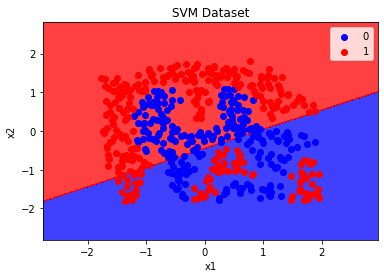

In [102]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('SVM Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


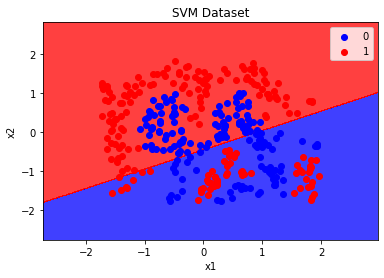

In [103]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('SVM Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [104]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [105]:
accuracy_score(Y_train,y_train_pred)

0.9303675048355899

In [106]:
recall_score(Y_train,y_train_pred)

0.9115646258503401

In [107]:
precision_score(Y_train,y_train_pred)

0.9640287769784173

In [108]:
f1_score(Y_train,y_train_pred)

0.9370629370629371

In [109]:
accuracy_score(Y_test,y_test_pred)

0.930635838150289

In [110]:
f1_score(Y_test,y_test_pred)

0.9337016574585636

In [111]:
recall_score(Y_test,y_test_pred)

0.9086021505376344

In [112]:
precision_score(Y_test,y_test_pred)

0.9602272727272727